<a href="https://colab.research.google.com/github/Goyo0117970/TelecomX-2/blob/main/TelecomX%202%20Machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFORME:
El siguiente Análisis busca identificar posibles factores de deserción de clientes de la Empresa Telecom X, ya que muchos han decidio prescindir de nuestros servicios, lo cual es preocupante para la Gerencia, por este motivo hacen entrega de archivo de base de datos para realizar el análisis correspondiente del caso y detectar el o los posibles motivos de estas decisiones negativas que afectan de manera directa a esta empresa. En un estudio inicla se realizó con herramientas de análisis no tan sofisticadas como las que se implementarán a continuación y esto se hará con Machine Learning, lo cual es una herramienta muy robusta y especialmente diseñada para este tipo de caso. Esta base de datos maneja los siguientes campos:

Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

##📌 Extracción

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
dato = requests.get(url)

##🔧 Transformación

In [148]:
data = dato.json()
df = pd.json_normalize(data)
#print(df.head())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [149]:
df.shape

(7267, 21)

In [150]:
print(df['Churn'].unique())

['No' 'Yes' '']


In [151]:
df = df[df["Churn"].notna()].copy()

In [152]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [153]:
print(df['Churn'].unique())

[ 0.  1. nan]


El campo Churn tenía las opciones Yes y No, por tal motivo y para que sea mejor entendido en el entrenamiento se procede a cambiar a 0 y 1, pero se observan que existen campos sin datos por lo cual se procede a eliminarlos y de esta forma podamos tener unos datos más expeditos

In [154]:
df = df[df["Churn"].notna()].copy()


In [155]:
print(df["Churn"].unique())         # → [0, 1]
print(df["Churn"].isna().sum())     # → 0


[0. 1.]
0


In [156]:
df["Churn"] = df["Churn"].astype(int)

In [157]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [158]:
print(df['Churn'].unique())

[0 1]


In [159]:
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [160]:
print(y.isnull().sum())


0


In [161]:
print(X.isnull().sum().sort_values(ascending=False).head(10))


customerID                  0
customer.gender             0
customer.SeniorCitizen      0
customer.Partner            0
customer.Dependents         0
customer.tenure             0
phone.PhoneService          0
phone.MultipleLines         0
internet.InternetService    0
internet.OnlineSecurity     0
dtype: int64


In [162]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


customerID                  0
Churn                       0
customer.gender             0
customer.SeniorCitizen      0
customer.Partner            0
customer.Dependents         0
customer.tenure             0
phone.PhoneService          0
phone.MultipleLines         0
internet.InternetService    0
dtype: int64


In [163]:
print(y.value_counts(dropna=False))
print(y.dtype)


Churn
0    5174
1    1869
Name: count, dtype: int64
int64


Revisando que no exista campos vacios

In [164]:
missing_counts = X.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print(missing_cols.sort_values(ascending=False))


Series([], dtype: int64)


In [165]:
# Resetear índices del DataFrame original
df_clean = df.copy().reset_index(drop=True)

# Definir X e y sincronizados
y = df_clean["Churn"]
X = df_clean.drop(columns=["Churn", "customerID"])


Probando varios modelos para obtener mejores resultados

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [167]:
# Codificar variables categóricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas entre train y test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [168]:
X_train.select_dtypes(include='object').columns

Index(['customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total'],
      dtype='object')

In [169]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [170]:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [171]:
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    y_proba = model.predict_proba(X_test_encoded)[:, 1]

    print(f"\n🔍 {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")



🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.77      0.64       374

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

ROC AUC: 0.8443

🔍 Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC: 0.8314


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:44:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1035
           1       0.56      0.47      0.51       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

ROC AUC: 0.8131


Ajustamos el umbral a 0.3

In [172]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_encoded, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [173]:
# Probabilidades de clase 1
y_proba_lr = lr_model.predict_proba(X_test_encoded)[:, 1]

# Ajustar umbral (por ejemplo, 0.3)
threshold = 0.3
y_pred_adjusted = (y_proba_lr >= threshold).astype(int)


In [174]:
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación
print(classification_report(y_test, y_pred_adjusted, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Matriz de confusión:\n", cm)


              precision    recall  f1-score   support

           0      0.936     0.596     0.728      1035
           1      0.443     0.888     0.591       374

    accuracy                          0.674      1409
   macro avg      0.689     0.742     0.660      1409
weighted avg      0.805     0.674     0.692      1409

Matriz de confusión:
 [[617 418]
 [ 42 332]]


In [175]:
# Diccionario de modelos (si aún no lo tenés)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100),
    "XGBoost": XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')
}

# Entrenar todos los modelos
for name, model in models.items():
    model.fit(X_train_encoded, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:47:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [176]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Umbral ajustado
threshold = 0.3

# Diccionario para guardar resultados
results = {}

for name, model in models.items():
    # Probabilidades de clase 1
    y_proba = model.predict_proba(X_test_encoded)[:, 1]

    # Predicción con umbral ajustado
    y_pred = (y_proba >= threshold).astype(int)

    # Métricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1 Score": round(f1, 3)
    }

# Mostrar resultados
import pandas as pd
pd.DataFrame(results).T.sort_values("Recall", ascending=False)


,Precision,Recall,F1 Score
Logistic Regression,0.443,0.888,0.591
Random Forest,0.532,0.762,0.626
XGBoost,0.522,0.676,0.589


Elegiremos para el estudio Logistic Regression, ya que tiene un 88% de los clientes que cancelan el servicio

In [177]:
import numpy as np
np.round(y_proba_lr, 2)


array([0.48, 0.87, 0.81, ..., 0.69, 0.26, 0.55])

In [178]:
# Crear etiquetas de riesgo
risk_labels = ["Bajo", "Medio", "Alto"]

# Definir cortes de probabilidad
risk_bins = [0, 0.4, 0.7, 1.0]

# Asignar nivel de riesgo
risk_levels = pd.cut(y_proba_lr, bins=risk_bins, labels=risk_labels)

# Mostrar distribución
pd.Series(risk_levels).value_counts().sort_index()


,count
Bajo,780
Medio,322
Alto,307


Alto riesgo (307 clientes): foco inmediato para campañas de retención. Se  Pueden priorizar llamadas, descuentos, o intervenciones personalizadas.

Riesgo medio (322 clientes): seguimiento proactivo. Quizás emails, encuestas, o mejoras en el servicio.

Bajo riesgo (780 clientes): mantener convenios, pero sin invertir demasiado.

In [181]:
# Codificamos variables categóricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)


In [183]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo sobre los datos codificados
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_encoded, y_train)


LogisticRegression(max_iter=1000)

In [184]:
import shap

# Creamos el explicador SHAP
explainer = shap.LinearExplainer(final_model, X_train_encoded, feature_perturbation="interventional")

# Calculamos los SHAP values
shap_values = explainer.shap_values(X_train_encoded)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [191]:
# Calculamos la importancia media absoluta
importance_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='importance', ascending=False)

# Mostramos las 5 variables más importantes
top_5 = importance_df.head(5)
print(top_5)


                                   feature importance
1                          customer.tenure    0.74039
9     internet.InternetService_Fiber optic   0.473364
24               account.Contract_Two year   0.423191
23               account.Contract_One year   0.216144
27  account.PaymentMethod_Electronic check   0.189122


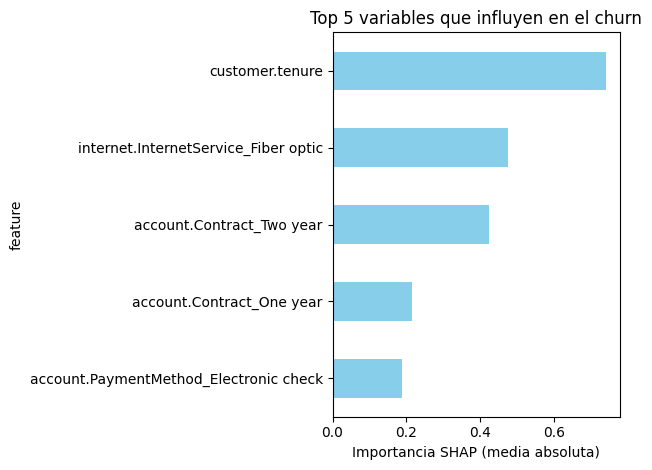

In [194]:
import matplotlib.pyplot as plt

# Usamos el DataFrame que ya generaste con las importancias
top_5.plot(kind='barh', x='feature', y='importance', legend=False, color='skyblue')
plt.xlabel('Importancia SHAP (media absoluta)')
plt.title('Top 5 variables que influyen en el churn')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


XXXXXXXX

Probando umbral con Logistic Regressión

Probamos Random Forest con el mismo Umbral

XXXXXXXXXXXXX

Procedemos a estudiar las variables que afectan más el churn

Según resultados si tomamos en cuenta como más importantes las 5 primeras opciones los clientes con menos antigûedad son los que mayormente se van, igualmente los que tienen el servicio de fibra óptica

###Análisis de Correlación

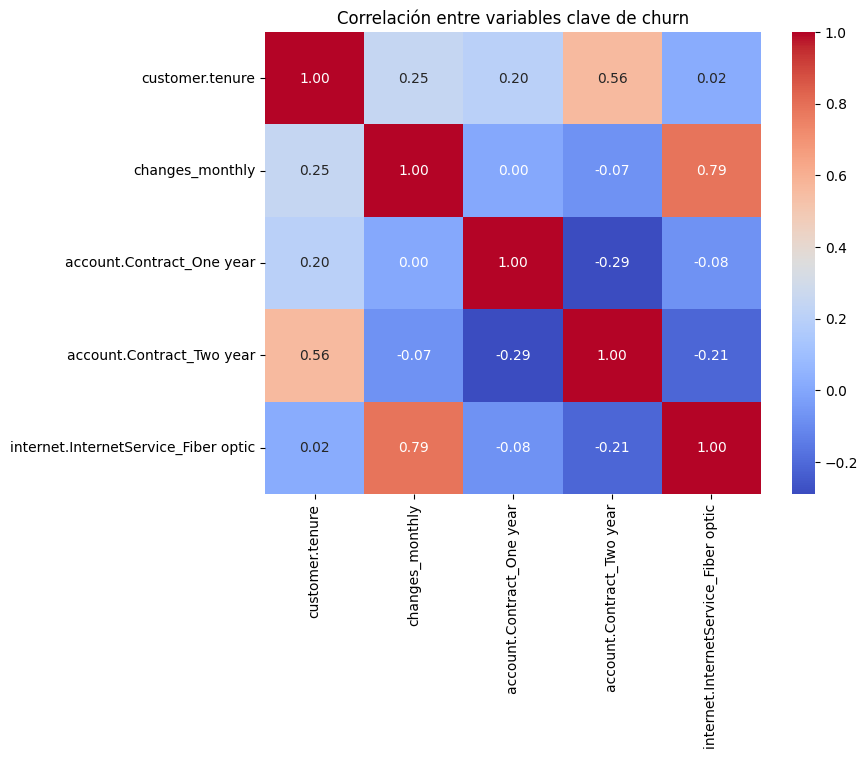

In [229]:
# Codificar contrato y tipo de internet
df_encoded = pd.get_dummies(df[['account.Contract', 'internet.InternetService']], drop_first=False)

# Crear variable de cambios mensuales (si tienes datos históricos, si no, omitir)
# Aquí solo se usa el cargo mensual actual como proxy
df['changes_monthly'] = df['account.Charges.Monthly']  # Placeholder si no tienes variación

# Construir el nuevo DataFrame con las variables clave
selected_vars = [
    'customer.tenure',
    'changes_monthly',
    'account.Contract_One year',
    'account.Contract_Two year',
    'internet.InternetService_Fiber optic'
]

df_corr = pd.concat([df[['customer.tenure', 'changes_monthly']], df_encoded[['account.Contract_One year', 'account.Contract_Two year', 'internet.InternetService_Fiber optic']]], axis=1)

# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables clave de churn")
plt.show()



hasta aquí hoy 07/08/2025

Prueba varios modelos para verificar cual da mejores resultados

##Exploraremos para visualizar los porcentajes combinando diferentes campos

Se observa el mayor abandono de los clientes de Fibra óptica,teléfono con pagos mes a mes 62,17%, es un número muy significativo

Realizaremos un análisis por tiempo de suscripción para determinar si son clientes antiguos o nuevos, tomando lapsos de 6 meses

Según resultado puede observarse que son los clientes nuevos quienes más abandonan TelecomX

Se procede a realizar la misma gráfica, pero agregando el campo Internet.service.

Y como puede observarse los resultados son muy parecidos al anterior, se determina el problema con la fibra óptica durante los primeros meses de suscripción

Puede observarse que de 1.699 usuarios que se fueron con contratos de telefonía: en los primeros 6 meses cancelaron el servicio el 52,91%. y dentro de los que tuvieron contratos de 7 a 12 meses se retiró el 36,85%

##📊 Carga y análisis


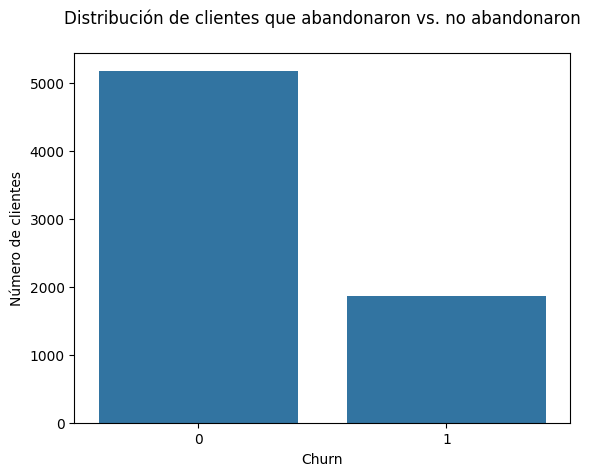

Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [233]:
sns.countplot(data=df, x='Churn')
plt.title('Distribución de clientes que abandonaron vs. no abandonaron\n')
plt.ylabel('Número de clientes')
plt.show()

# Porcentaje
churn_rate = round(df['Churn'].value_counts(normalize=True) * 100,2)
print(churn_rate)

Los clientes con fibra óptica y poco tiempo de suscripción abandonan más temprano

El servicio "No" (sin internet) tiene mayor rotación

Los clientes que llevan más tiempo son más leales a un tipo de servicio

In [236]:
sns.set_theme(style='ticks', context='talk', palette='tab10')


##📄Informe final

Objetivo del análisis:
Identificar las posibles causas del abandono de clientes en la empresa Telecom X, utilizando la información contenida en la base de datos entregada.

🔍 Hallazgos Principales
A partir del análisis exploratorio y gráfico realizado, se identificaron las siguientes tendencias clave entre los clientes que abandonaron la empresa:

Tipo de Servicio:

La mayoría de los clientes que abandonan el servicio están suscritos a servicios de fibra óptica y tienen activa la línea telefónica.

Antigüedad del Cliente:

El mayor índice de abandono se concentra en clientes con menos de 7 meses de permanencia (etapa inicial del ciclo de vida).

Tipo de Contrato:

La mayoría de los clientes que abandonan tienen contratos de mes a mes, lo que facilita su salida sin penalidades.


⚠️ Posibles Causas del Abandono
Con base en los datos y hallazgos anteriores, se sugieren las siguientes causas potenciales del abandono:

Expectativas no cumplidas: Posible falsa publicidad o sobreventa de beneficios del servicio de fibra óptica y telefonía.

Calidad del servicio: Problemas técnicos o de atención al cliente durante los primeros meses, cuando el cliente es más vulnerable.

Ausencia de fidelización: Falta de propuestas de valor atractivas o incentivos para mantener a los nuevos clientes.

Competencia y comparación: Clientes que prueban el servicio por poco tiempo y luego se cambian a otras empresas con mejores planes o precios.

Flexibilidad contractual excesiva: El contrato mes a mes da mucha facilidad para abandonar sin consecuencias.

Falta de seguimiento postventa: Posible falta de contacto proactivo con nuevos clientes para garantizar satisfacción inicial.

✅ Recomendaciones
Revisar la oferta de servicios de fibra óptica y telefonía, especialmente para clientes nuevos, asegurando que se cumpla lo prometido.

Diseñar campañas de fidelización temprana, que refuercen la relación con el cliente durante los primeros 6 meses.

Implementar encuestas de satisfacción post instalación y en los primeros 3 meses para detectar problemas a tiempo.

Mejorar la atención técnica y soporte, enfocándose en los clientes con contrato mensual.

Reformular contratos mes a mes, incluyendo beneficios por permanencia o migración a contratos más estables.

📌 Conclusión
Los clientes nuevos con contratos flexibles y servicios de fibra óptica están abandonando en una etapa crítica. Atender esta situación con acciones preventivas e inteligentes puede mejorar la retención de clientes y reducir significativamente los costos de captación.